# Prep

In [1]:
import pandas as pd
from tqdm import tqdm


df = pd.read_csv('df_preprocessed.csv')
df = df.drop(df.columns[:2], axis = 1)

import ast
df['poem'] = df['poem'].apply(ast.literal_eval)
df['poem_lemma'] = df['poem_lemma'].apply(ast.literal_eval)


hun_stopwords = []
with open('stopwords.txt','r') as o:
    for line in o:
        hun_stopwords.append(line)
import re
hun_stopwords = [re.sub("\n", "", x) for x in hun_stopwords]

[hun_stopwords.append(x) for x in 
    ['hogyha', 'szó', 'mond', 'akar', 'oly', 'beszéd', 
    'monda', 'miként', 'beszél', 'féle', 'vajha', 'amiképp',
    'vesz', 'tesz', 'dal', 'szem']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [2]:
df['poem_lemma'] = [" ".join([y for y in x if y not in hun_stopwords]) for x in df.poem_lemma]
df = df[['poet', 'poem_lemma']]

In [3]:
import spacy
#import huspacy

In [4]:
train_df = df.groupby('poet', group_keys=False).apply(lambda x: x.sample(frac=0.77, random_state=42))
dev_df = df.drop(train_df.index).apply(lambda x: x.sample(frac=0.6, random_state=42))
test_df = df.drop(train_df.index).drop(dev_df.index)


/var/folders/by/h73r5x5n1q56dbvrgcz7hys00000gn/T/ipykernel_5781/1099377535.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_df = df.groupby('poet', group_keys=False).apply(lambda x: x.sample(frac=0.77, random_state=42))


In [67]:
nlp = spacy.blank('hu')

In [ ]:
from spacy.tokens import DocBin

def convert_from_df(df,outfile, text_column = 'poem_lemma', label_column = 'poet'):
    db = DocBin()
    
    # label = 'poet'
    for text, label in zip(df[text_column], df[label_column]):
        doc = nlp.make_doc(text)
        doc.cats = {poet: False for poet in df[label_column].unique()}
        
        # Set the current label category to True
        doc.cats[label] = True
        db.add(doc)
    
    db.to_disk(outfile)

poet_labels = df.poet.unique()

convert_from_df(train_df, outfile="./train.spacy")
convert_from_df(dev_df,  outfile="./dev.spacy")
convert_from_df(test_df, outfile="./test.spacy")

In [69]:
!python -m spacy init config  --lang hu --pipeline textcat --optimize efficiency --force config.cfg

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: hu
- Pipeline: textcat
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: hu
- Pipeline: textcat
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None


✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [70]:
!python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy --output model --verbose

[2024-12-02 18:00:16,890] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
[2024-12-02 18:00:16,890] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================


[2024-12-02 18:00:17,028] [INFO] Set up nlp object from config
[2024-12-02 18:00:17,036] [DEBUG] Loading corpus from path: dev.spacy
[2024-12-02 18:00:17,037] [DEBUG] Loading corpus from path: train.spacy
[2024-12-02 18:00:17,037] [INFO] Pipeline: ['textcat']
[2024-12-02 18:00:17,039] [INFO] Created vocabulary
[2024-12-02 18:00:17,039] [INFO] Finished initializing nlp object
[2024-12-02 18:00:17,028] [INFO] Set up nlp object from config
[2024-12-02 18:00:17,036] [DEBUG] Loading corpus from path: dev.spacy
[2024-12-02 18:00:17,037] [DEBUG] Loading corpus from path: train.spacy
[2024-12-02 18:00:17,037] [INFO] Pipeline: ['textcat']
[2024-12-02 18:00:17,039] [INFO] Created vocabulary
[2024-12-02 18:00:17,039] [INFO] Finished initializing nlp object


[2024-12-02 18:00:30,685] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2024-12-02 18:00:30,693] [DEBUG] Loading corpus from path: dev.spacy
[2024-12-02 18:00:30,685] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2024-12-02 18:00:30,693] [DEBUG] Loading corpus from path: dev.spacy


[2024-12-02 18:00:30,694] [DEBUG] Loading corpus from path: train.spacy
[2024-12-02 18:00:30,696] [DEBUG] Removed existing output directory: model/model-best
[2024-12-02 18:00:30,698] [DEBUG] Removed existing output directory: model/model-last
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------
[2024-12-02 18:00:30,694] [DEBUG] Loading corpus from path: train.spacy
[2024-12-02 18:00:30,696] [DEBUG] Removed existing output directory: model/model-best
[2024-12-02 18:00:30,698] [DEBUG] Removed existing output directory: model/model-last
ℹ Pipeline: ['textcat']
ℹ Initial learn rate: 0.001
E    #       LOSS TEXTCAT  CATS_SCORE  SCORE 
---  ------  ------------  ----------  ------


  0       0          0.07        1.55    0.02
  0       0          0.07        1.55    0.02


  0     200         13.20       24.23    0.24
  0     200         13.20       24.23    0.24


  0     400         11.36       44.02    0.44
  0     400         11.36       44.02    0.44


  0     600          8.70       54.47    0.54
  0     600          8.70       54.47    0.54


  0     800          7.40       60.65    0.61
  0     800          7.40       60.65    0.61


  0    1000          6.82       68.82    0.69
  0    1000          6.82       68.82    0.69


  0    1200          6.12       74.68    0.75
  0    1200          6.12       74.68    0.75


  0    1400          4.87       76.30    0.76
  0    1400          4.87       76.30    0.76


  0    1600          4.40       77.13    0.77
  0    1600          4.40       77.13    0.77


  0    1800          4.66       78.30    0.78
  0    1800          4.66       78.30    0.78


  1    2000          2.22       78.69    0.79
  1    2000          2.22       78.69    0.79


  1    2200          1.45       78.19    0.78
  1    2200          1.45       78.19    0.78


  1    2400          1.21       78.73    0.79
  1    2400          1.21       78.73    0.79


  2    2600          1.25       80.94    0.81
  2    2600          1.25       80.94    0.81


  2    2800          0.63       80.76    0.81
  2    2800          0.63       80.76    0.81


  2    3000          0.75       81.15    0.81
  2    3000          0.75       81.15    0.81


  3    3200          0.68       80.97    0.81
  3    3200          0.68       80.97    0.81


  3    3400          0.42       80.33    0.80
  3    3400          0.42       80.33    0.80


  4    3600          0.38       80.11    0.80
  4    3600          0.38       80.11    0.80


  4    3800          0.30       80.46    0.80
  4    3800          0.30       80.46    0.80


  4    4000          0.23       80.34    0.80
  4    4000          0.23       80.34    0.80


  5    4200          0.34       80.23    0.80
  5    4200          0.34       80.23    0.80


  5    4400          0.38       79.78    0.80
  5    4400          0.38       79.78    0.80


  6    4600          0.28       79.68    0.80
  6    4600          0.28       79.68    0.80


✔ Saved pipeline to output directory
model/model-last
✔ Saved pipeline to output directory
model/model-last


In [73]:
!python -m spacy evaluate ./model/model-best/ ./test.spacy

ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0



================================== Results ==================================

TOK                 100.00
TEXTCAT (macro F)   74.44 
SPEED               247960


=========================== Textcat F (per label) ===========================

                   P       R       F
Ady            81.20   89.62   85.20
AranyJ         72.09   81.58   76.54
Babits         68.29   62.22   65.12
Balassi       100.00   77.78   87.50
Csokonai       94.44   85.00   89.47
Jozsef         81.13   74.14   77.48
Karinthy        0.00    0.00    0.00
Kolcsey       100.00   83.33   90.91
Kosztolanyi    72.86   82.26   77.27
Madach        100.00   66.67   80.00
Petofi         90.54   84.81   87.58
Radnoti        84.62   64.71   73.33
Vorosmarty     66.25   92.98   77.37


======================== Textcat ROC AUC (per label) ========================

              ROC AUC
Ady              0.97
AranyJ           0.98
Babits           0.94
Balassi          1.00
Csokonai         0.98
Jozsef           0.97
Karin

In [5]:
nlp = spacy.load("./model/model-best")

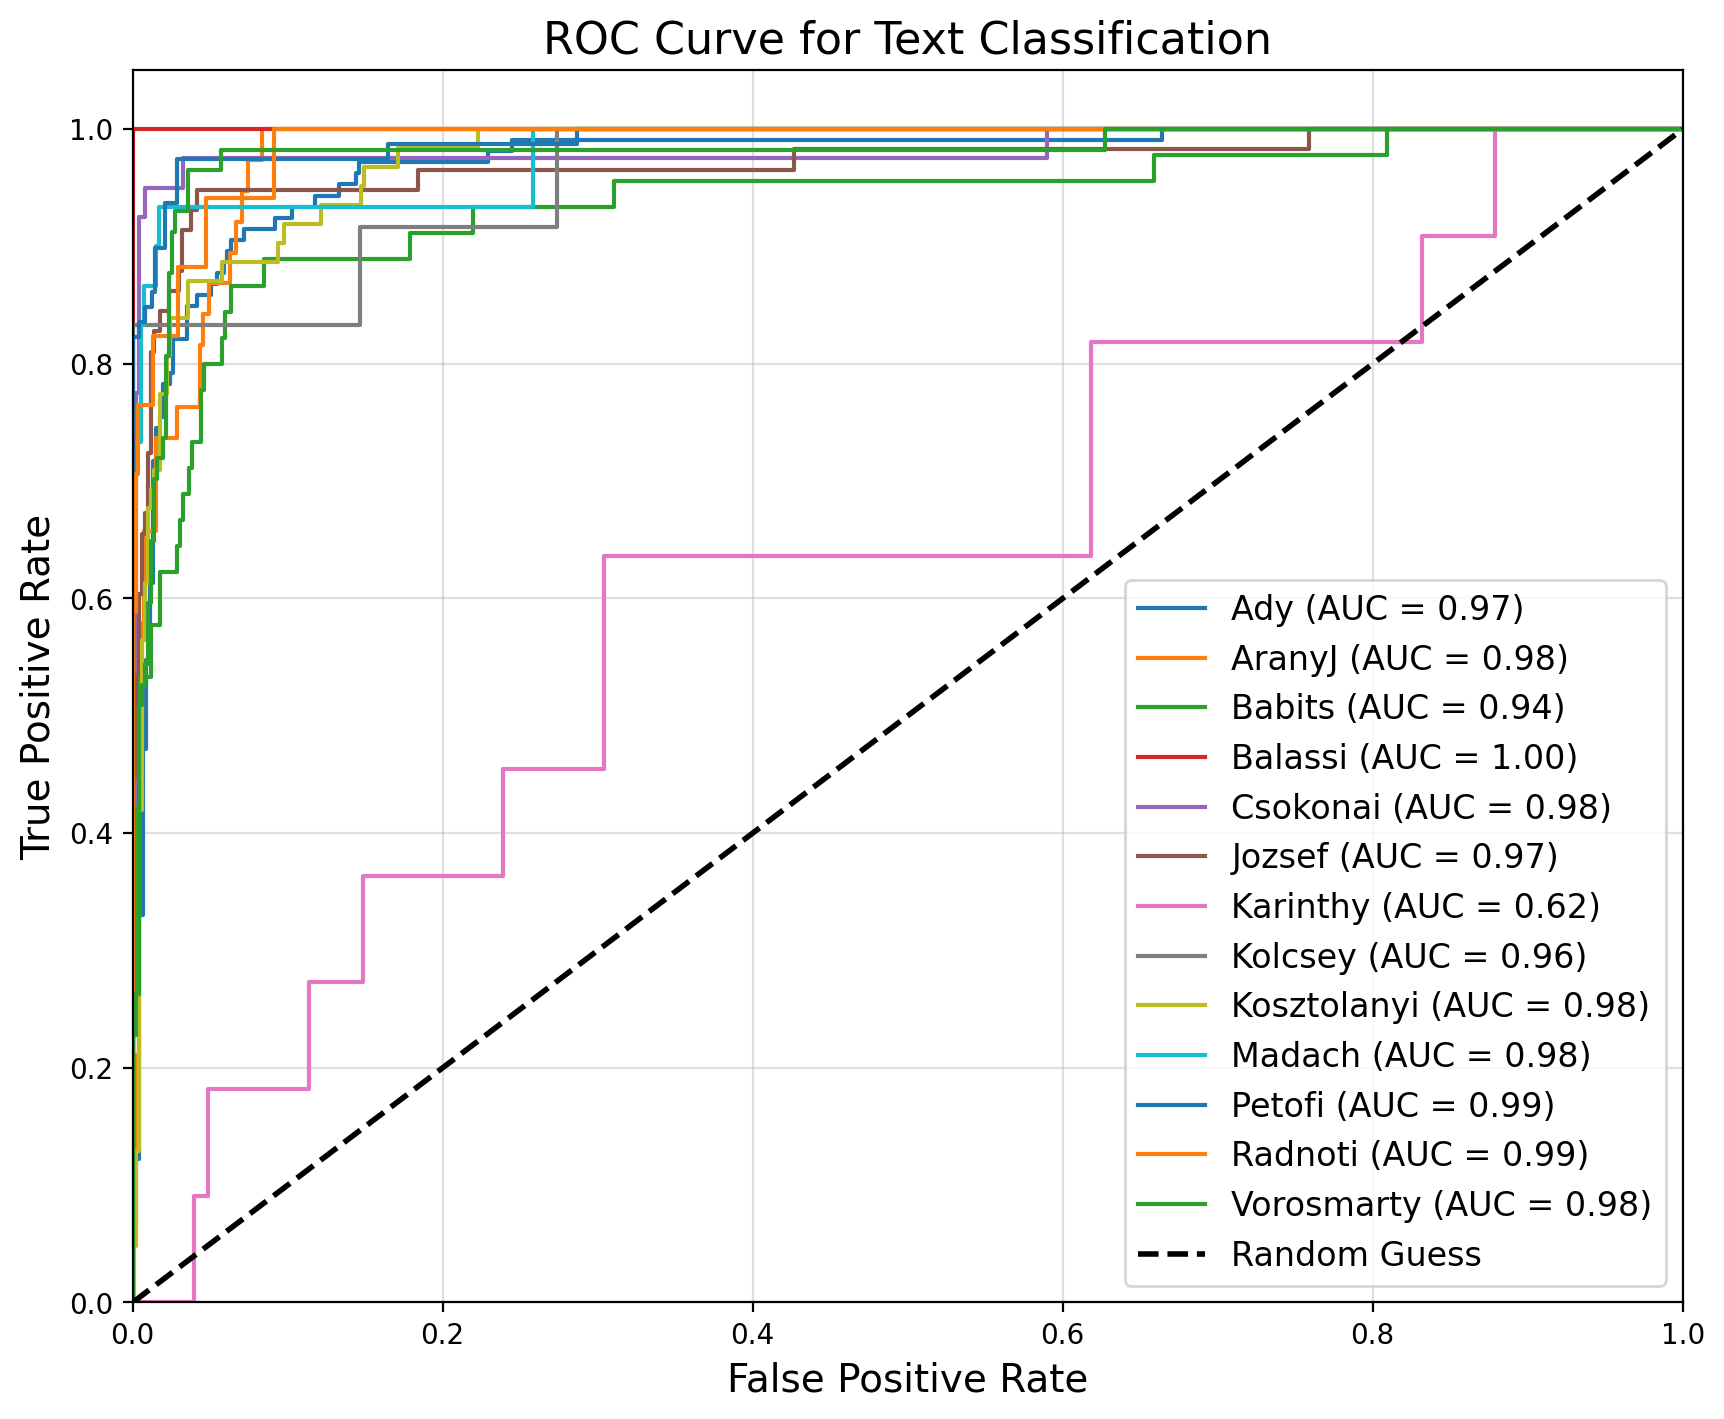

In [111]:
from spacy.tokens import DocBin
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Load the test data
doc_bin = DocBin().from_disk("./test.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

# Collect true labels and predictions
true_labels = []
predicted_probs = {label: [] for label in nlp.pipe_labels["textcat"]}


for doc in docs:
    true_labels.append(doc.cats)
    preds = nlp(doc.text).cats
    for label in preds:
        predicted_probs[label].append(preds[label])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8), dpi=200)

auc_per_poet = defaultdict(list)
for label in predicted_probs:
    y_true = [cats[label] for cats in true_labels]
    y_scores = predicted_probs[label]
    
    # Ensure y_true is a binary list of 0s and 1s
    y_true = [int(bool(val)) for val in y_true]
    
    # Ensure y_scores is a list of floats
    y_scores = [float(score) for score in y_scores]
    
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    auc_per_poet[label].append(roc_auc)
    
    plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})")

    
plt.plot([0, 1], [0, 1], "k--", lw=2, label="Random Guess")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve for Text Classification", fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.4)
plt.show()



In [113]:
import matplotlib.pyplot as plt

auc_per_poet = dict(auc_per_poet)
auc_per_poet = pd.DataFrame(auc_per_poet)
auc_per_poet = auc_per_poet.T
auc_per_poet.columns = ['score']
auc_per_poet.reset_index(inplace=True)
auc_per_poet.columns = ['poet', 'auc']


pdf = test_df.groupby('poet').size().sort_values(ascending=True)

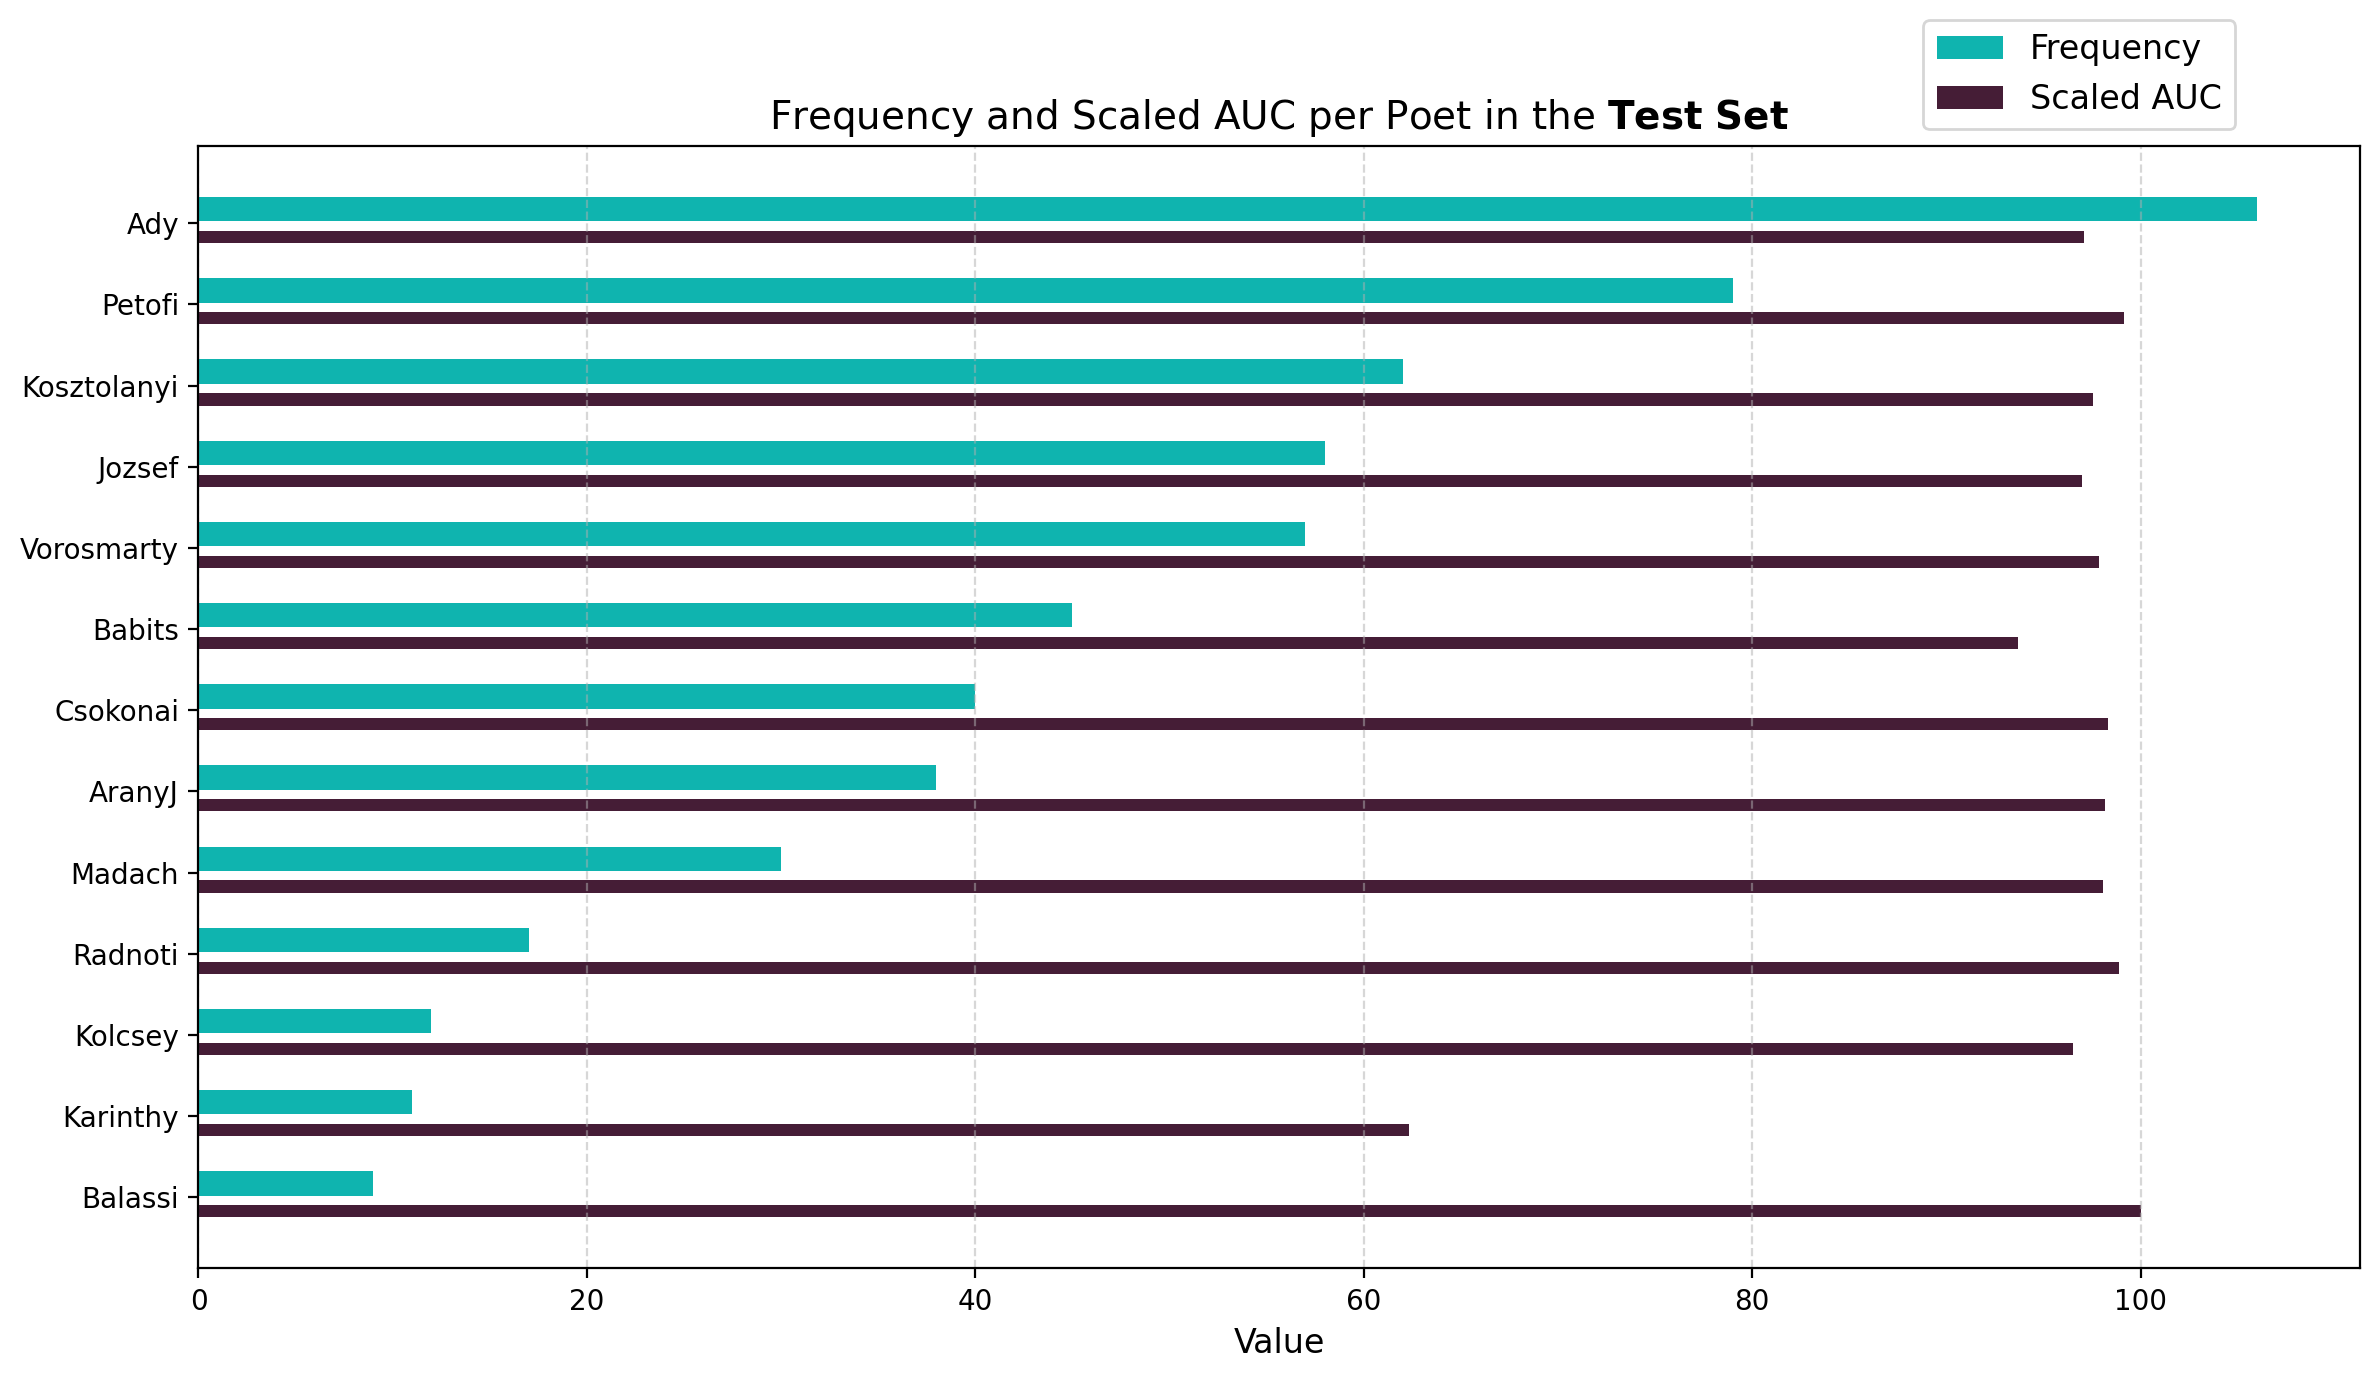

In [114]:
pdf2 = pd.DataFrame(pdf).reset_index().merge(auc_per_poet, on = 'poet')
pdf2.columns = ['poet', 'freq', 'auc']

freq_max = pdf2['freq'].max()
auc_scaled = pdf2['auc'] * 100  # Scale AUC to the range of frequencies

# Offset for dodging
bar_width = 0.3
poet_indices = np.arange(len(pdf2['poet']))

# Plot
plt.figure(figsize=(12, 7), dpi = 200)
#ax = plt.axes()
#ax.set_facecolor('#FCF9F1')

plt.barh(poet_indices + bar_width / 1.75, pdf2['freq'], bar_width, label='Frequency', color='#0FB4AF')
plt.barh(poet_indices - bar_width / 1.75, auc_scaled, bar_width/2, label='Scaled AUC', color='#451D36')

# Add labels and legend
plt.yticks(poet_indices, pdf2['poet'])
plt.xlabel('Value', fontsize=12)
plt.ylabel('')
plt.title('Frequency and Scaled AUC per Poet in the $\mathbf{Test\ Set}$', fontsize=14)
plt.legend(loc = 'lower right', fontsize=12, bbox_to_anchor=(.95, 1))
plt.grid(axis='x', linestyle='--', alpha=0.5)



# Show plot
plt.tight_layout()
plt.show()

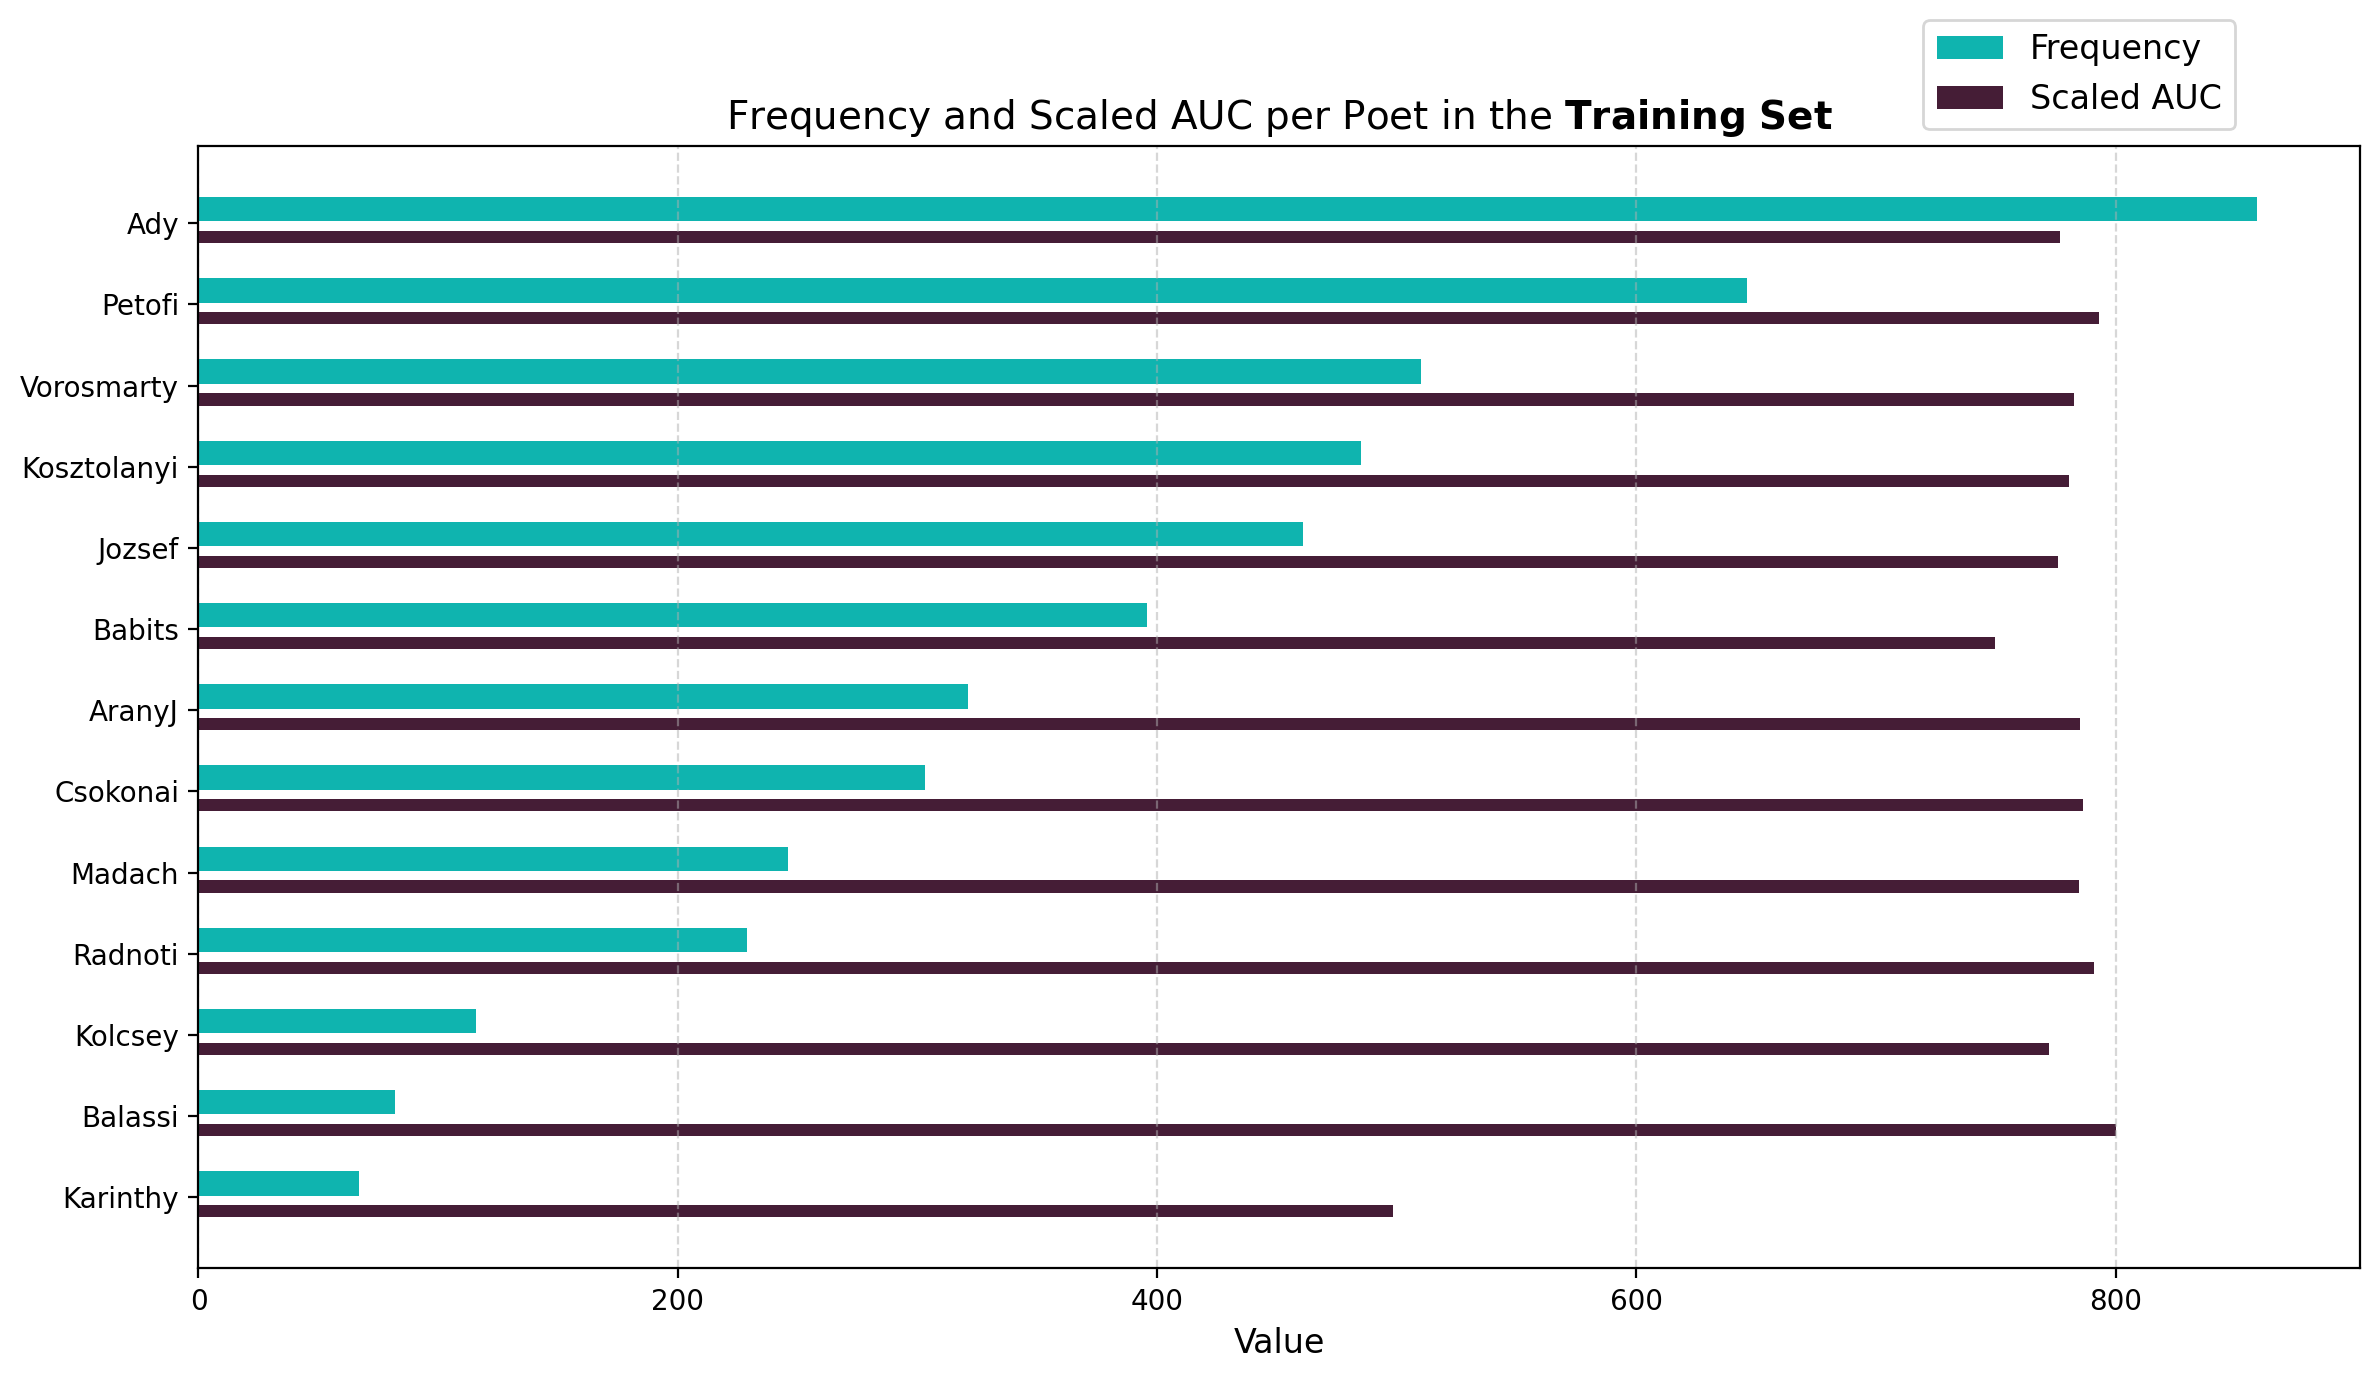

In [115]:
pdf3 = train_df.groupby('poet').size().sort_values(ascending=True)

pdf4 = pd.DataFrame(pdf3).reset_index().merge(auc_per_poet, on = 'poet')
pdf4.columns = ['poet', 'freq', 'auc']

freq_max = pdf4['freq'].max()
auc_scaled = pdf4['auc'] * 800  # Scale AUC to the range of frequencies

# Offset for dodging
bar_width = 0.3
poet_indices = np.arange(len(pdf4['poet']))

# Plot
plt.figure(figsize=(12, 7), dpi = 200)
#ax = plt.axes()
#ax.set_facecolor('#FCF9F1')

plt.barh(poet_indices + bar_width / 1.75, pdf4['freq'], bar_width, label='Frequency', color='#0FB4AF')
plt.barh(poet_indices - bar_width / 1.75, auc_scaled, bar_width/2, label='Scaled AUC', color='#451D36')

# Add labels and legend
plt.yticks(poet_indices, pdf4['poet'])
plt.xlabel('Value', fontsize=12)
plt.ylabel('')
plt.title('Frequency and Scaled AUC per Poet in the $\mathbf{Training\ Set}$', fontsize=14)
plt.legend(loc = 'lower right', fontsize=12, bbox_to_anchor=(.95, 1))
plt.grid(axis='x', linestyle='--', alpha=0.5)



# Show plot
plt.tight_layout()
plt.show()

# Teszt

## Ady: Nyárdélutáni hold rómában

In [ ]:
doc = nlp("""Sandítva száll Rómára
Fecske-raj-követséggel,
Vigyorog vígan széjjel
Nyárdélutáni Hold.
Nagy kékség és pirosság
Most újból-újból hozzák
Régből azt, ami volt.
Szent mezők pára-fátylat,
Hegyek álom-színt váltnak,
Diadalok s romok,
Nap s Hold közé beszőve,
Hanyattan az Időbe
Róma sürög-forog.
Óh, gyönyörű örökség,
Változó, ős, szent község,
Urbs, te feledtető,
Az én-élet poklából
Lelkem-testem kilábol,
Te szent, védő tető.

Ím, magam idehoztam,
Védj és boríts be mostan,
Te szép, te bölcs, örök.
Örökkön éltem, élek,
Csupán hüvelyt cserélek,
Mint Ulisszes-görög.
Áldom a nyüzsgő Rómát,
Mindennek átfogóját,
Pulyásan is nagyot.
Ma, hogyha úgy akarnám,
Alkonyi álom karján
Akár Remus vagyok.
Nézem a mai nőket,
A volt és lesz időket:
Be régen élek itt
S be minden élet mindegy
S a Hold már ismer minket,
Vigyorog s nem hevít:
Sandítva száll Rómára.""")

print(sorted(doc.cats.items(), key=lambda item: item[1], reverse=True))

[('Ady', 0.6256720423698425), ('Babits', 0.18055830895900726), ('Jozsef', 0.05460432171821594), ('Vorosmarty', 0.0539250522851944), ('Petofi', 0.03594687953591347), ('Kosztolanyi', 0.01609889231622219), ('Kolcsey', 0.00993380881845951), ('Csokonai', 0.008644383400678635), ('Madach', 0.007531622424721718), ('AranyJ', 0.003602896584197879), ('Balassi', 0.001917822752147913), ('Radnoti', 0.0008366082911379635), ('Karinthy', 0.0007273107185028493)]
[('Ady', 0.6256720423698425), ('Babits', 0.18055830895900726), ('Jozsef', 0.05460432171821594), ('Vorosmarty', 0.0539250522851944), ('Petofi', 0.03594687953591347), ('Kosztolanyi', 0.01609889231622219), ('Kolcsey', 0.00993380881845951), ('Csokonai', 0.008644383400678635), ('Madach', 0.007531622424721718), ('AranyJ', 0.003602896584197879), ('Balassi', 0.001917822752147913), ('Radnoti', 0.0008366082911379635), ('Karinthy', 0.0007273107185028493)]


In [76]:
doc = nlp("""
A MAGYAR NÉP
	 	

Szabad a magyar nép, szabad valahára,
Kinek láncot vertek kezére, lábára,
S görbedt derekával a rabigát vonta,
Mintha csak állat és nem ember lett volna.

Szabad a magyar nép, fejét föltarthatja,
Kénye-kedve szerint kezeit mozgatja,
S mely előbb mint bilincs őtet szorította,
A vasat mint kardot ő szorítja mostan.

Szabad a magyar nép... lejárt napod, német!
Nem táncoltatod te többé ezt a népet,
S pióca módjára nem szívod a vérét,
Megfizette isten gonoszságod bérét.

E földön legyen úr a tót vagy a német?
E földön, hol annyi vitéz magyar vérzett!
Magyar vér szerezte ezt a dicső hazát,
És magyar vér ezer évig ótalmazá!

Nincs itt urasága csak az egy magyarnak,
S kik a mi fejünkre állani akarnak,
Azoknak mi állunk feje tetejére,
S vágjuk sarkantyúnkat szíve közepébe!

Vigyázz, magyar, vigyázz, éjjel is ébren légy,
Ki tudja, mikor üt rajtad az ellenség?
Ha eljön, ugy jőjön, hogy készen találjon,
Még a félhalott se maradjon az ágyon!

Haza és szabadság, ez a két szó, melyet
Először tanuljon dajkától a gyermek,
És ha a csatában a halál eléri,
Utószor e két szót mondja ki a férfi!""")



print(sorted(doc.cats.items(), key=lambda item: item[1], reverse=True))

[('Petofi', 0.6059380173683167), ('Vorosmarty', 0.1437848061323166), ('Ady', 0.08475317806005478), ('AranyJ', 0.052388403564691544), ('Jozsef', 0.041521597653627396), ('Babits', 0.029419589787721634), ('Csokonai', 0.023742645978927612), ('Madach', 0.009019370190799236), ('Kosztolanyi', 0.008703101426362991), ('Kolcsey', 0.00030073453672230244), ('Karinthy', 0.00028921494958922267), ('Radnoti', 8.483553392579779e-05), ('Balassi', 5.458527448354289e-05)]
[('Petofi', 0.6059380173683167), ('Vorosmarty', 0.1437848061323166), ('Ady', 0.08475317806005478), ('AranyJ', 0.052388403564691544), ('Jozsef', 0.041521597653627396), ('Babits', 0.029419589787721634), ('Csokonai', 0.023742645978927612), ('Madach', 0.009019370190799236), ('Kosztolanyi', 0.008703101426362991), ('Kolcsey', 0.00030073453672230244), ('Karinthy', 0.00028921494958922267), ('Radnoti', 8.483553392579779e-05), ('Balassi', 5.458527448354289e-05)]


# Naive Bayes

In [106]:
poet_labels = df.poet.unique()

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df['poem_lemma'])
X_dev = vectorizer.transform(dev_df['poem_lemma'])
X_test = vectorizer.transform(test_df['poem_lemma'])

y_train = train_df['poet']
y_dev = dev_df['poet']
y_test = test_df['poet']


In [ ]:
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

MultinomialNB()

In [109]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

y_pred_test = nb_model.predict(X_test)
y_pred_proba_test = nb_model.predict_proba(X_test)

print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_test))


Classification Report (Test Set):
              precision    recall  f1-score   support

         Ady       0.28      0.98      0.44       106
      AranyJ       0.00      0.00      0.00        38
      Babits       0.00      0.00      0.00        45
     Balassi       0.00      0.00      0.00         9
    Csokonai       1.00      0.25      0.40        40
      Jozsef       1.00      0.05      0.10        58
    Karinthy       0.00      0.00      0.00        11
     Kolcsey       0.00      0.00      0.00        12
 Kosztolanyi       0.86      0.19      0.32        62
      Madach       0.00      0.00      0.00        30
      Petofi       0.52      0.95      0.68        79
     Radnoti       0.00      0.00      0.00        17
  Vorosmarty       0.92      0.40      0.56        57

    accuracy                           0.40       564
   macro avg       0.35      0.22      0.19       564
weighted avg       0.49      0.40      0.31       564



/Users/aronsomogyi/miniforge3/envs/bertopic/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aronsomogyi/miniforge3/envs/bertopic/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/aronsomogyi/miniforge3/envs/bertopic/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

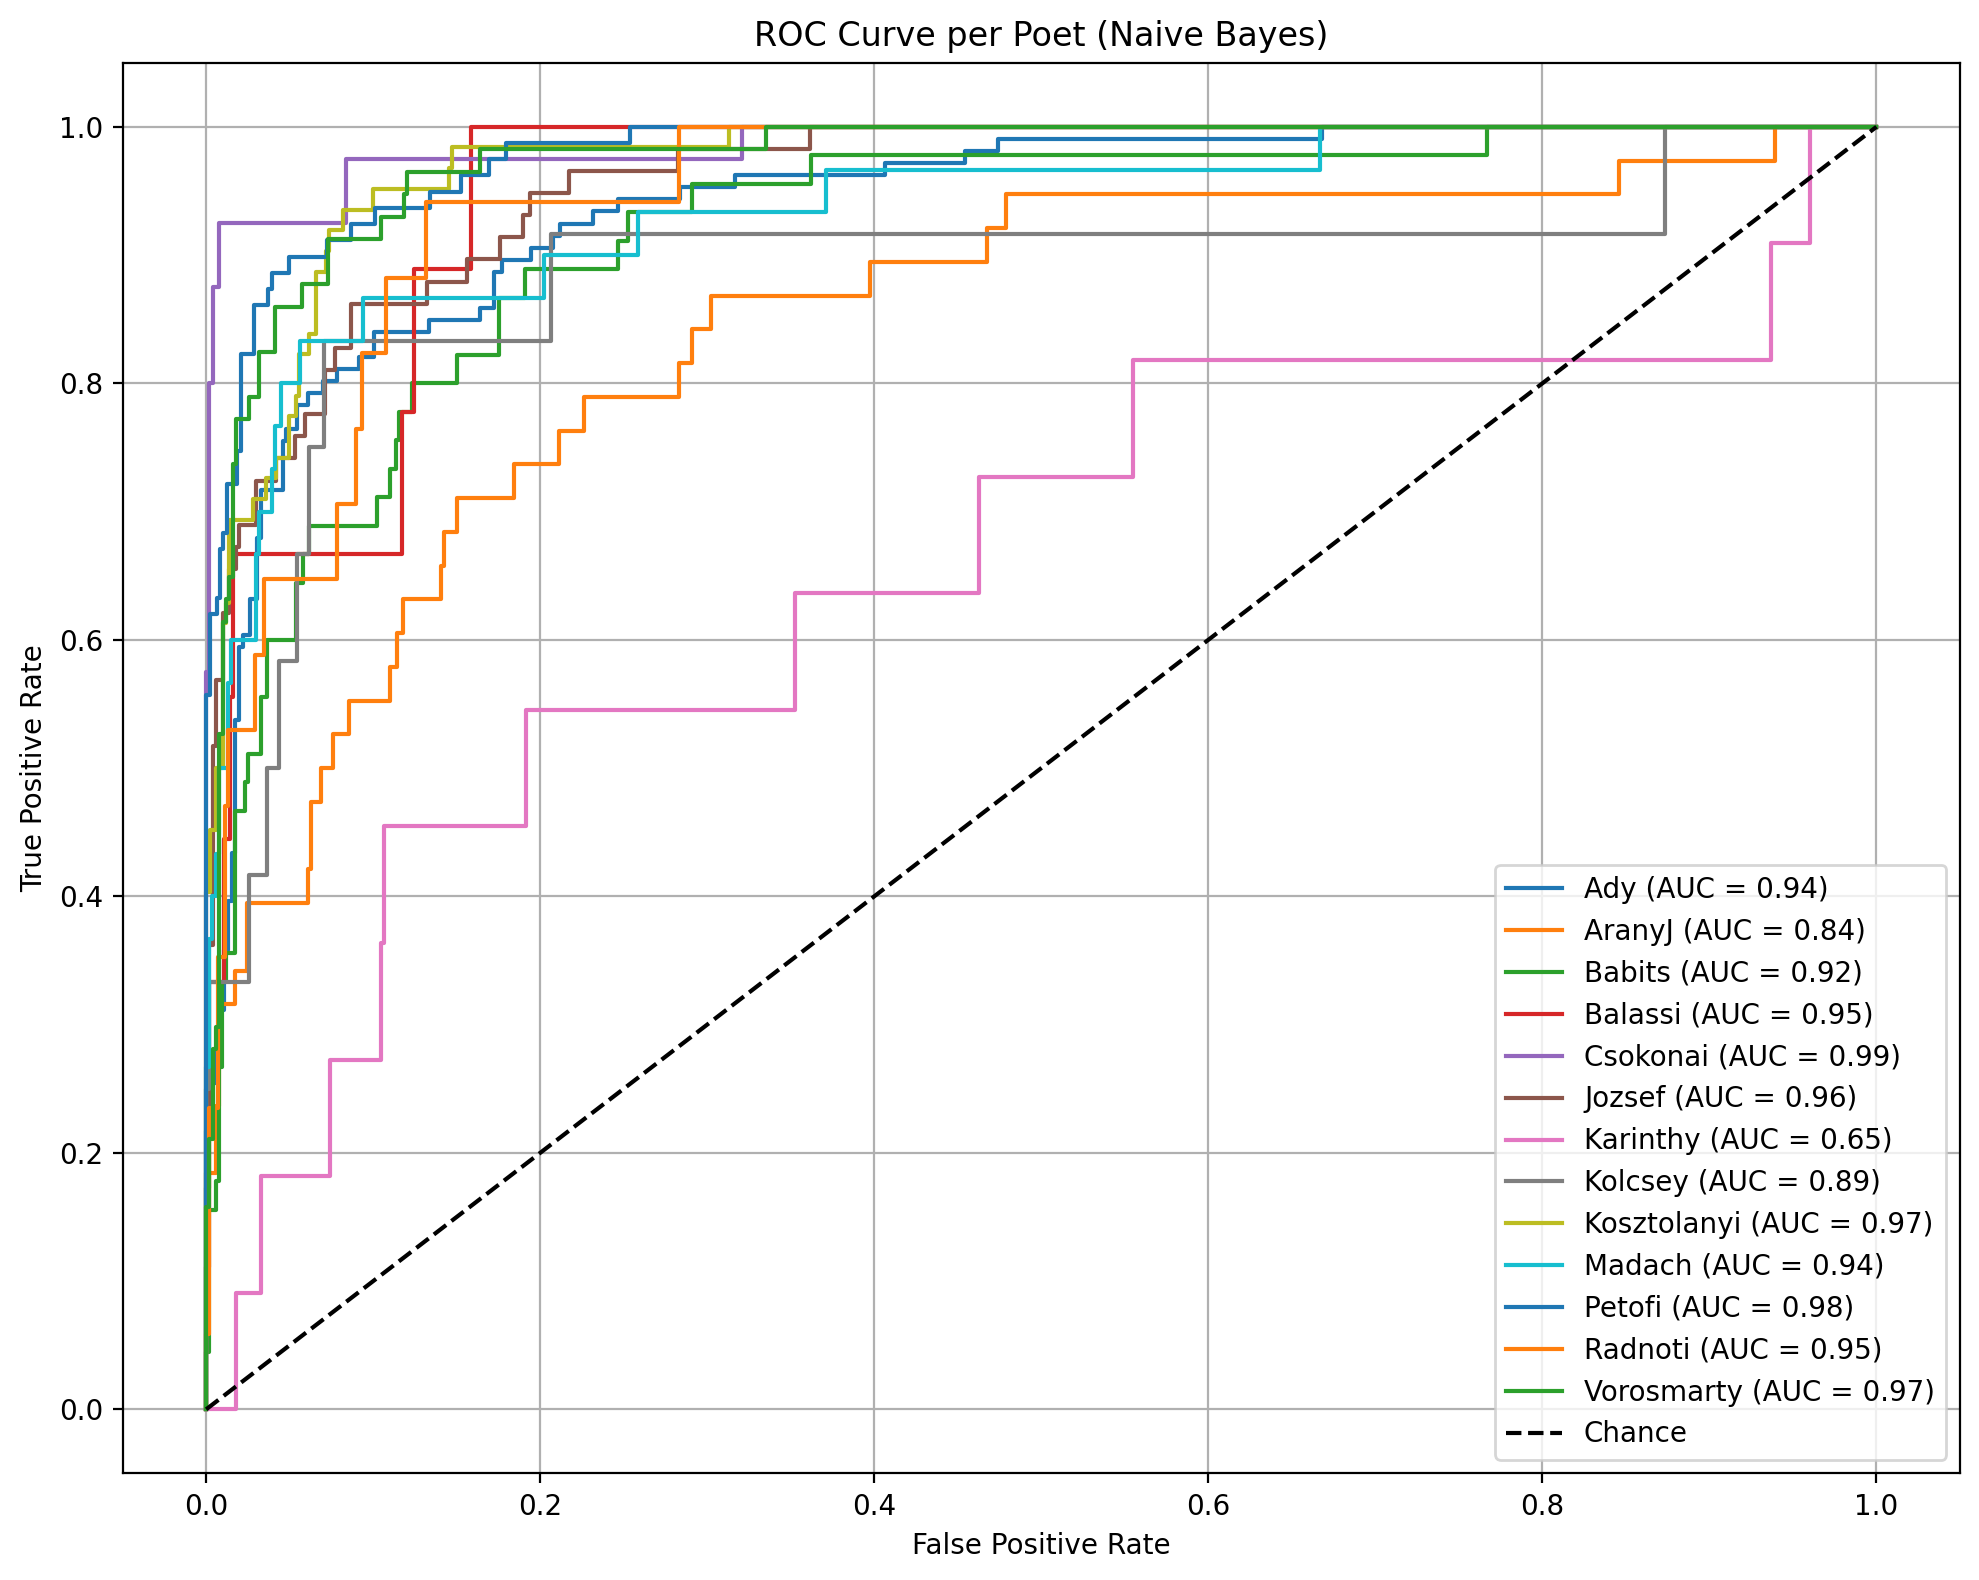

In [116]:
poet_labels = train_df['poet'].unique()
y_test_bin = pd.get_dummies(y_test)  # One-hot encode test labels
fpr = {}
tpr = {}
roc_auc = {}

plt.figure(figsize=(10, 8), dpi=200)
for i, poet in enumerate(poet_labels):
    fpr[poet], tpr[poet], _ = roc_curve(y_test_bin[poet], y_pred_proba_test[:, i])
    roc_auc[poet] = roc_auc_score(y_test_bin[poet], y_pred_proba_test[:, i])
    plt.plot(fpr[poet], tpr[poet], label=f'{poet} (AUC = {roc_auc[poet]:.2f})')

# Add ROC details
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve per Poet (Naive Bayes)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()